In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", "Earthquakes")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

EARTHQUAKES_PATH = os.path.join("..","datasets", "Earthquakes")

def load_earthquake_data(islanders_path=EARTHQUAKES_PATH):
    csv_path = os.path.join(islanders_path, "database.csv")
    return pd.read_csv(csv_path)

earthquakes = load_earthquake_data(EARTHQUAKES_PATH)

#get the first 5 rows of the dataset
earthquakes.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
#get the last 5 rows of the dataset
earthquakes.tail()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [4]:
#Q1 How many attribuites in the data set? Desribe the attribuites.
print("Number of Attribute = ",len(earthquakes.columns))

 #  Date                       - a string holding the date of the erthquake in the form mm/dd/yyyy (python dates are in mm-dd-yyyy)
 #  Time                       - a string holding the time down to the second of the earthquake
 #  Latitude                   - a float representing the vertical component of the earthquake's coordinate 
 #  Longitude                  - a float representing the horozontal component of the earthquake's coordinate 
 #  Type                       - nominal attribute for source of seismic station's detection: Earthquake, Nuclear, Explosion, Explosion, Rock Burst   
 #  Depth                      - a float representing how many km down the epicentre of the earthquake was
 #  Depth Error                - depth plus or minus the depth error is the range of values the depth could be in
 #  Depth Seismic Stations     - seismic stations are often in old mines, the depth in km of the station recording earthquakes 
 #  Magnitude                  - the energy realsed by an earthquake measured
 #  Magnitude Type             - nominal values giving us the way the magnitude was measured
 #  Magnitude Error            - magnitude plus or minus the magnitude error is the range of values the depth could be in
 #  Magnitude Seismic Stations - not sure
 #  Azimuthal Gap              - Earthquake's locations are trianglulated by 3 siesmic stations, the Azimuthal Gap is the largest angle between them in degrees
 #  Horizontal Distance        - The horzontal distance the earthquake traveled
 #  Horizontal Error           - The upper and lower bound for error in horzontal distance the earthquake traveled
 #  Root Mean Square           - 
 #  ID                         - unique id of earthquake
 #  Source                     - nomial data telling us what institution detected the earthquake: US, ISCGEM, ISCGEMSUP, CL, GCMT
 #  Location Source            - nomial data telling us what institution measured the location of the earthquake: US, ISCGEM, CL, GCMT, NC
 #  Magnitude Source           - nomial data telling us what institution measured the magnitude the earthquake: US, HRV, ISCGEM, GCMT, NC
 #  Status                     - has the earthquake been manually reviewed or automatically reviewed

Number of Attribute =  21


In [5]:
#loads all the attributes and the number of filled fields in them
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
# Any attribute with less than 23412 non-null values, is missing values
#  Depth Error               
#  Depth Seismic Stations    
#  Magnitude Type            
#  Magnitude Error           
#  Magnitude Seismic Stations
#  Azimuthal Gap             
#  Horizontal Distance       
#  Horizontal Error          
#  Root Mean Square          

In [7]:
earthquakes["Type"].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [8]:
earthquakes["Magnitude Type"].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

# Q3 What does the value_count() method display?
It gives us a break down of all the values of a given attribute and how many instances of each there are

<AxesSubplot:>

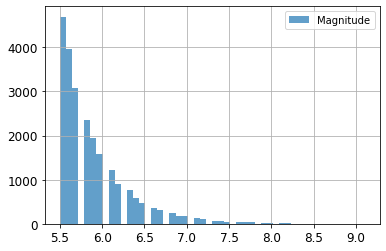

In [9]:
#gives us multiple histograms on the same axis, comparing different magnitude tpyes
#ML are earthquakes measured in the richter scale
#MS are surface earquakes measured
#each colour represents the distribution of different scales
earthquakes.Magnitude.hist(bins= 50, legend=True, alpha = 0.7 )

Magnitude Type
MB     AxesSubplot(0.125,0.125;0.775x0.755)
MD     AxesSubplot(0.125,0.125;0.775x0.755)
MH     AxesSubplot(0.125,0.125;0.775x0.755)
ML     AxesSubplot(0.125,0.125;0.775x0.755)
MS     AxesSubplot(0.125,0.125;0.775x0.755)
MW     AxesSubplot(0.125,0.125;0.775x0.755)
MWB    AxesSubplot(0.125,0.125;0.775x0.755)
MWC    AxesSubplot(0.125,0.125;0.775x0.755)
MWR    AxesSubplot(0.125,0.125;0.775x0.755)
MWW    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Magnitude, dtype: object

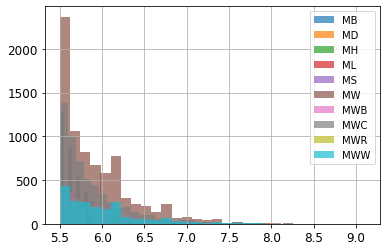

In [10]:
earthquakes.groupby("Magnitude Type").Magnitude.hist(legend = True, bins=30,alpha = 0.7)

mean
 Latitude                        1.679033
Longitude                      39.639961
Depth                          70.767911
Depth Error                     4.993115
Depth Seismic Stations        275.364098
Magnitude                       5.882531
Magnitude Error                 0.071820
Magnitude Seismic Stations     48.944618
Azimuthal Gap                  44.163532
Horizontal Distance             3.992660
Horizontal Error                7.662759
Root Mean Square                1.022784
dtype: float64
Saving figure attribute_histogram_plots


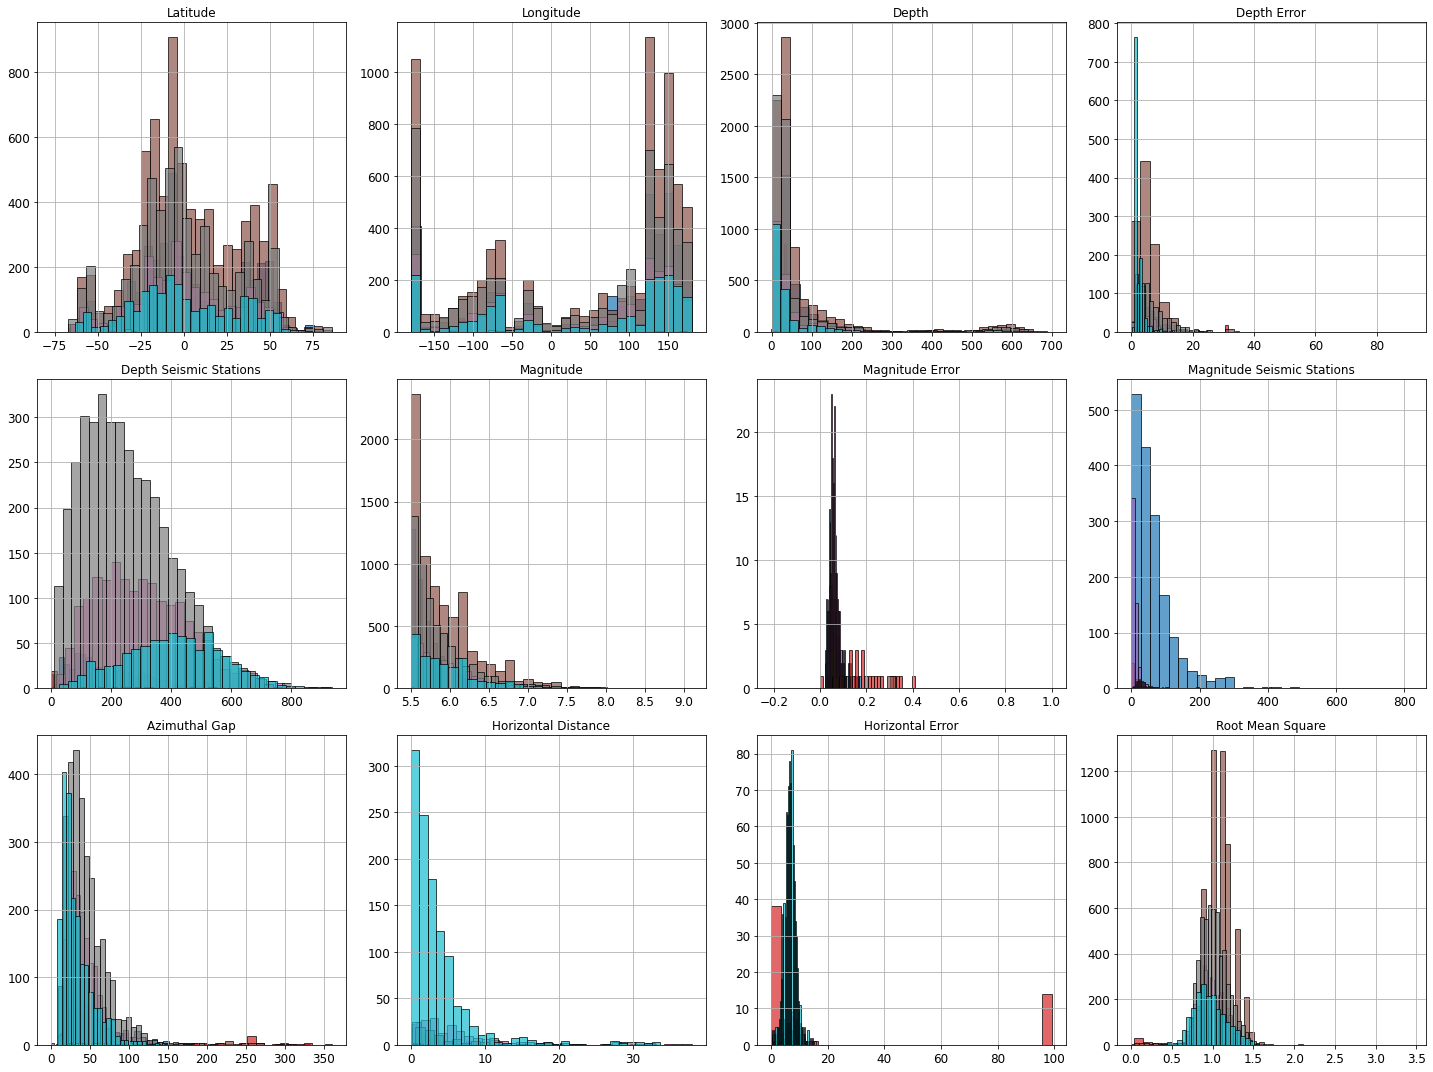

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3, 4, figsize=(20,15))

earthquakes.groupby("Magnitude Type").hist(legend = False, bins=30,  edgecolor = "black", ax = axis, alpha = 0.7)

print("mean\n",earthquakes.mean())
save_fig("attribute_histogram_plots")
plt.grid(True)
plt.show()


Saving figure type_histogram_plots


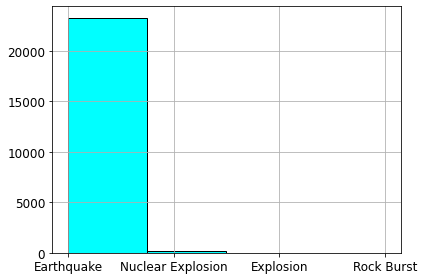

In [12]:
earthquakes["Type"].hist(bins=4, figsize=(6,4),color = "cyan", edgecolor = "black")
save_fig("type_histogram_plots")
plt.show()

# Q4 List down the main observations you noted from the statistical summary and the histogram
*Note the legends didnt work for showing the names of different magnitude types, I can see the differences but cannot identify them.
-The positions of the earthquakes based on magnitude type occur is varying frequency but in a similar distribution. This indicates that most eartquake take place in the same set of locations.
-Depth is normally distributed with a strong positive skew, most earthquakes are 'shallow' at 70Km. There is also a second much smaller peak of 'deep' earthquakes at a depth of around 600Km.
-Depth error is similarly distributed to Depth, with a similar second bump, suggesting that deeper earthquakes have a larger error, how ever there is no way to check in the bump refers to the same earthquakes or not.
-The depth of seismic stations is normally distributed. It seems like different depth are speacialised for reading different types of magnitudes, as seen by the stacked normal distributions on the graph.
-Azimuthal gap is also normally distrubuted with a strong positive corrolation, suggesting that seismologists prefer to be 45 degrees apart
-Magnitude, magnitude error and horizontal distance are all logarithmically distributed. Magnitude of an earthquake is measured using a logarithmic scale so this suggests that the data is accurate. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

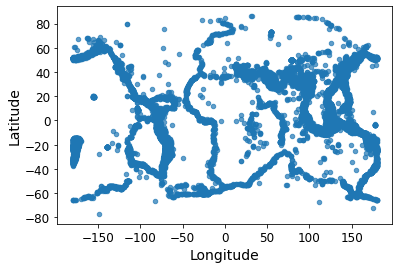

In [13]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
earthquakes.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.7)

# Maps the longitude aggainst the latitude, which shows us the postions of earthquakes relative to eachother. This gives us a map of the earth's tectonic fault lines


<AxesSubplot:xlabel='Magnitude Seismic Stations', ylabel='Depth Seismic Stations'>

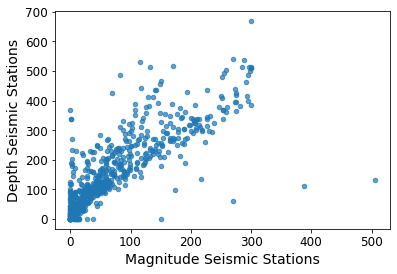

In [14]:
earthquakes.plot(kind="scatter", x="Magnitude Seismic Stations", y="Depth Seismic Stations", alpha=0.7,)
#we can see a strong corrolation between the Magnitude Seismic Stations and Depth Seismic Stations


<AxesSubplot:xlabel='Horizontal Distance', ylabel='Depth'>

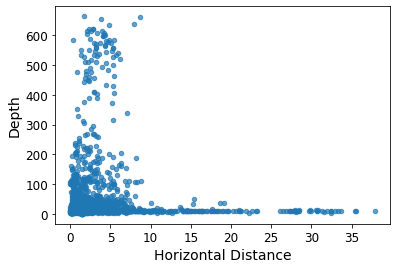

In [15]:
earthquakes.plot(kind="scatter", x="Horizontal Distance", y="Depth", alpha=0.7,)
# Shallow earthquakes can be seen to permiate further along the surface than deep ones. Earthquakes with a depth of more than ~20Km dont permiate more than 10Km horizontally, while shallower earthquakes less tahn 20Km deep can permiate any distance upto 35Km.

<AxesSubplot:xlabel='Depth', ylabel='Magnitude'>

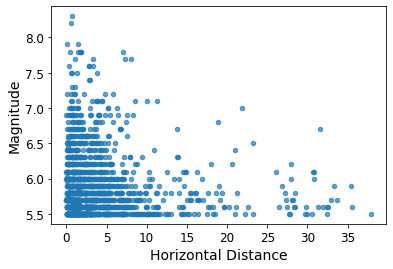

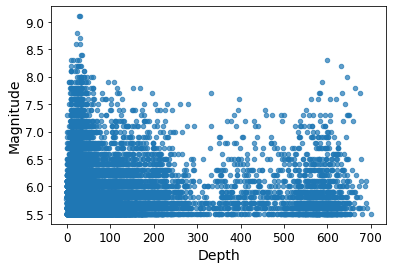

In [16]:
earthquakes.plot(kind="scatter", x="Horizontal Distance", y="Magnitude", alpha=0.7,)
earthquakes.plot(kind="scatter", x="Depth", y="Magnitude", alpha=0.7,)

#High magnitude earthquakes tend not to travel as far horozontally
#Earthquakes tend to appear <300Km down or >300Km down as shown by the dip in the middle of the graph


In [17]:
import datetime

for d in range(len(earthquakes["Date"])):
    earthquakes["Date"][d] = earthquakes["Date"][6:] + "-" + earthquakes["Date"][3:5] + "-" + earthquakes["Date"][:2]
print(earthquakes["Date"])
earthquakes.groupby(earthquakes["Date"].earthquakes.month).count().plot(kind="bar")
save_fig("Date_bar_plots")
plt.show()


<ipython-input-17-35ec3ba26213>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes["Date"][d] = earthquakes["Date"][6:] + "-" + earthquakes["Date"][3:5] + "-" + earthquakes["Date"][:2]


D:\Apps\Anaconda\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


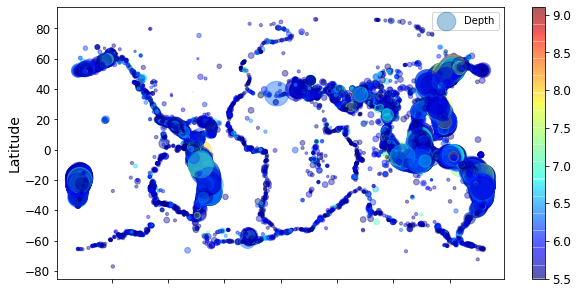

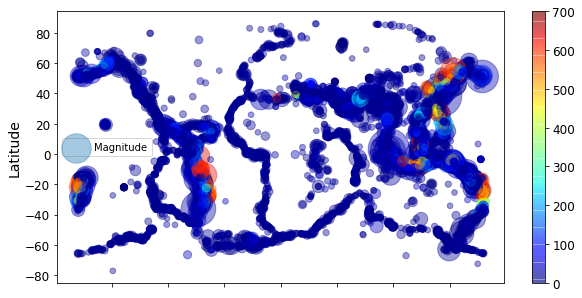

In [ ]:
earthquakes.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=earthquakes["Depth"], label="Depth", figsize=(10,5),
    c=earthquakes["Magnitude"], cmap=plt.get_cmap("jet"), colorbar=True
)
earthquakes.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
   s=(np.power(earthquakes["Magnitude"],(earthquakes["Magnitude"]/2.7))), label="Magnitude", figsize=(10,5),
    c=earthquakes["Depth"],  cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

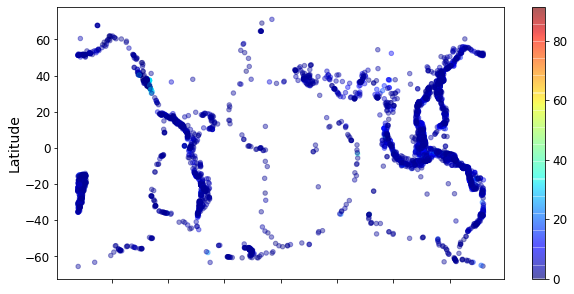

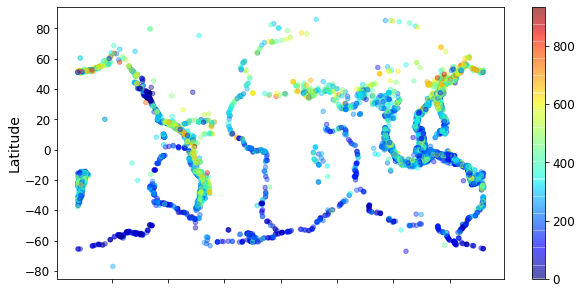

In [ ]:
earthquakes.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,5), 
    c=earthquakes["Depth Error"], cmap=plt.get_cmap("jet"), colorbar=True
)
earthquakes.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,5),
    c=earthquakes["Depth Seismic Stations"], cmap=plt.get_cmap("jet"), colorbar=True
)

No handles with labels found to put in legend.


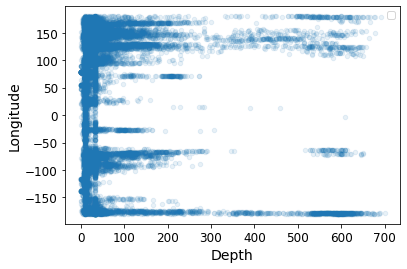

In [ ]:
earthquakes.plot(kind="scatter", x="Depth", y="Longitude", alpha=0.1,
)
plt.legend()

#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid lines?
#Earthquakes can only appear on fault lines so at the solid lines there is a corrosponding fault line on that longitude that the earhtquakes appear on

In [ ]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?
# The distance between the epicenter of the earthquake and the furthest point it could be felt
earthquakes["pythag_distance"] = np.sqrt(np.power(earthquakes["Horizontal Distance"],2)+np.power(earthquakes["Depth"],2))


<AxesSubplot:>

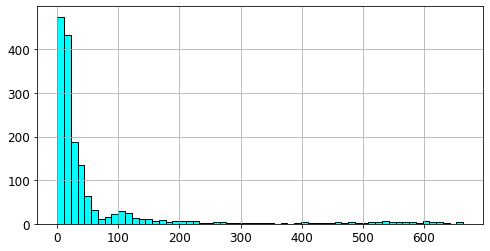

In [ ]:
earthquakes["pythag_distance"].hist(bins=60, figsize=(8,4),color = "cyan", edgecolor = "black")


array([[<AxesSubplot:xlabel='Depth', ylabel='Depth'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Depth'>,
        <AxesSubplot:xlabel='Depth Seismic Stations', ylabel='Depth'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Depth'>],
       [<AxesSubplot:xlabel='Depth', ylabel='Depth Error'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Depth Error'>,
        <AxesSubplot:xlabel='Depth Seismic Stations', ylabel='Depth Error'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Depth Error'>],
       [<AxesSubplot:xlabel='Depth', ylabel='Depth Seismic Stations'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Depth Seismic Stations'>,
        <AxesSubplot:xlabel='Depth Seismic Stations', ylabel='Depth Seismic Stations'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Depth Seismic Stations'>],
       [<AxesSubplot:xlabel='Depth', ylabel='Magnitude'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Magnitude'>,
        <AxesSubplot:xlabel='Depth Seismic Stations', 

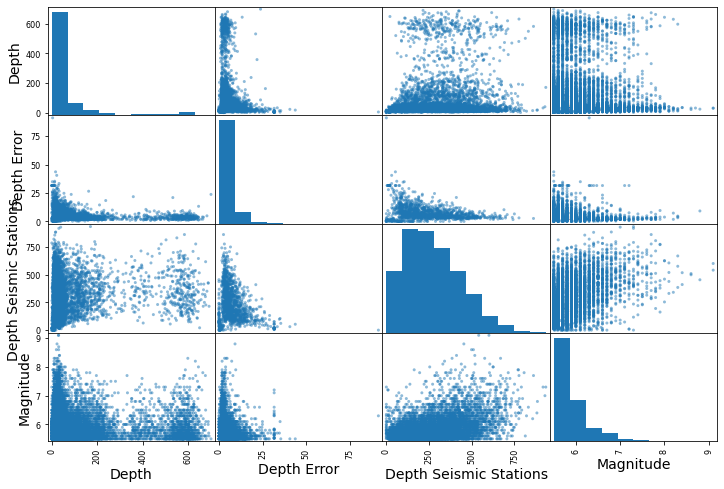

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Depth", "Depth Error", "Depth Seismic Stations",
              "Magnitude"]
scatter_matrix(earthquakes[attributes], figsize=(12, 8))


array([[<AxesSubplot:xlabel='Horizontal Distance', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Depth', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Horizontal Distance'>],
       [<AxesSubplot:xlabel='Horizontal Distance', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Depth', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Magnitude', ylabel='Horizontal Error'>],
       [<AxesSubplot:xlabel='Horizontal Distance', ylabel='Depth'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Depth'>,
        <AxesSubplot:xlabel='Depth', ylabel='Depth'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Depth'>,
        <AxesSub

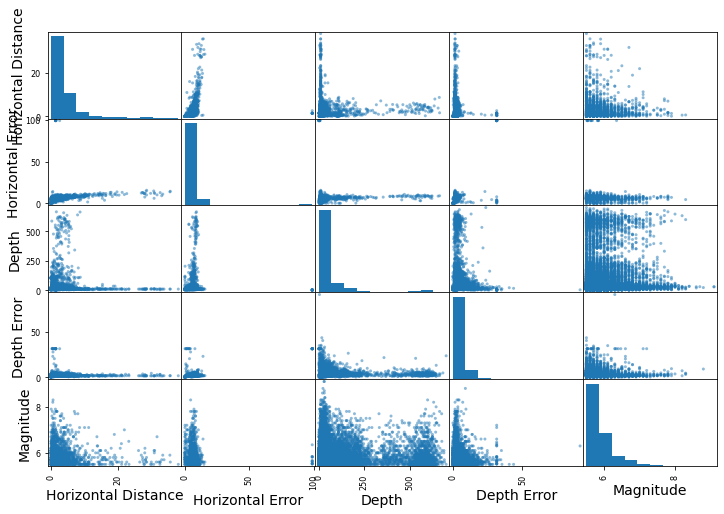

In [ ]:
attributes = ["Horizontal Distance", "Horizontal Error", "Depth", "Depth Error",
              "Magnitude"]
scatter_matrix(earthquakes[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Azimuthal Gap', ylabel='Azimuthal Gap'>,
        <AxesSubplot:xlabel='Horizontal Distance', ylabel='Azimuthal Gap'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Azimuthal Gap'>,
        <AxesSubplot:xlabel='Depth', ylabel='Azimuthal Gap'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Azimuthal Gap'>],
       [<AxesSubplot:xlabel='Azimuthal Gap', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Horizontal Distance', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Depth', ylabel='Horizontal Distance'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Horizontal Distance'>],
       [<AxesSubplot:xlabel='Azimuthal Gap', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Horizontal Distance', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Depth', ylabe

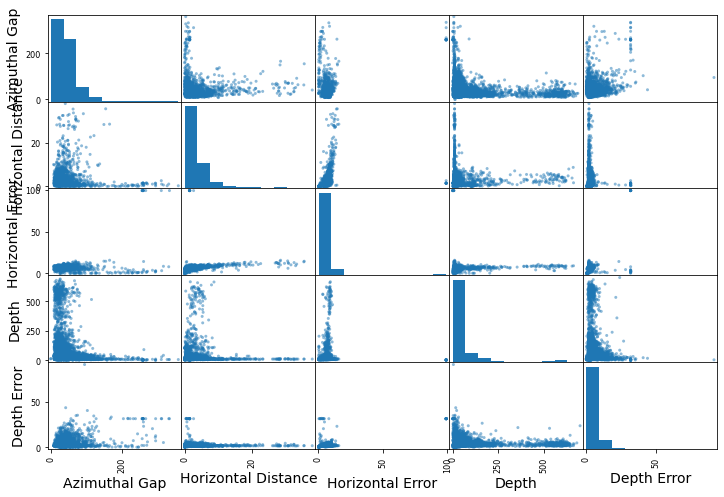

In [ ]:
attributes = ["Azimuthal Gap", "Horizontal Distance", "Horizontal Error", "Depth", "Depth Error"]
scatter_matrix(earthquakes[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = earthquakes.corr()
corr_matrix["pythag_distance"].sort_values(ascending=False)

pythag_distance               1.000000
Depth                         0.999521
Magnitude                     0.113267
Root Mean Square              0.064499
Longitude                     0.022538
Magnitude Seismic Stations    0.019375
Depth Error                   0.018599
Latitude                      0.006186
Horizontal Error             -0.000617
Horizontal Distance          -0.044465
Depth Seismic Stations       -0.046639
Magnitude Error              -0.064382
Azimuthal Gap                -0.185710
Name: pythag_distance, dtype: float64

In [ ]:
corr_matrix["Horizontal Error"].sort_values(ascending=False)

Horizontal Error              1.000000
Depth Error                   0.644593
Magnitude Error               0.617721
Azimuthal Gap                 0.396450
Root Mean Square              0.157842
Horizontal Distance           0.126877
Latitude                      0.015625
pythag_distance              -0.000617
Depth                        -0.016467
Magnitude                    -0.078406
Magnitude Seismic Stations   -0.093143
Longitude                    -0.093827
Depth Seismic Stations       -0.214959
Name: Horizontal Error, dtype: float64

array([[<AxesSubplot:xlabel='Magnitude Error', ylabel='Magnitude Error'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Magnitude Error'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Magnitude Error'>],
       [<AxesSubplot:xlabel='Magnitude Error', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Horizontal Error'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Horizontal Error'>],
       [<AxesSubplot:xlabel='Magnitude Error', ylabel='Depth Error'>,
        <AxesSubplot:xlabel='Horizontal Error', ylabel='Depth Error'>,
        <AxesSubplot:xlabel='Depth Error', ylabel='Depth Error'>]],
      dtype=object)

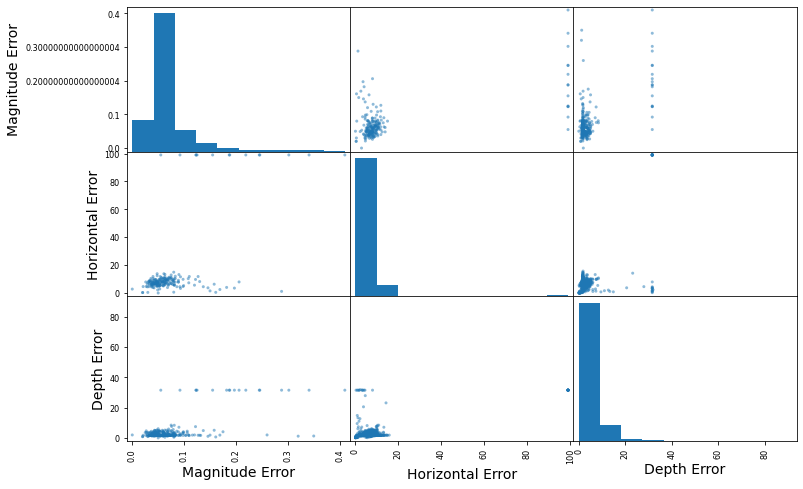

In [ ]:
attributes = ["Magnitude Error", "Horizontal Error", "Depth Error"]
scatter_matrix(earthquakes[attributes], figsize=(12, 8))

In [ ]:
earthquakes.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,pythag_distance
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,1604.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784,60.323921
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545,117.873384
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,0.260818
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,10.667679
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,19.119437
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,41.604458
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,664.002113


In [ ]:
#drop attributes with to many missing values
earthquakes.drop(columns=["Depth Error","Magnitude Error","Horizontal Error"])


,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,pythag_distance
0,0 NaN 1 NaN 3 NaN 4 ...,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,6.0,MW,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
1,0 NaN 1 NaN 3 NaN 4 ...,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
2,0 0 NaN 1 NaN 3 Na...,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,6.2,MW,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
3,0 0 NaN 1 NaN 3 Na...,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
4,0 0 NaN 1 NaN 3 Na...,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,40.0,5.6,ML,18.0,42.47,0.120,0.1898,NN00570710,NN,NN,NN,Reviewed,12.300585
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,33.0,5.5,ML,18.0,48.58,0.129,0.2187,NN00570744,NN,NN,NN,Reviewed,8.800945
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,NaN,5.9,MWW,NaN,91.00,0.992,1.5200,US10007NAF,US,US,US,Reviewed,10.049083
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,NaN,6.3,MWW,NaN,26.00,3.553,1.4300,US10007NL0,US,US,US,Reviewed,79.079857


In [ ]:
#drop atttributes with non numeric values
earthquakes.drop(columns=["Date","Time","Type","Status","Magnitude Type","ID","Source","Location Source","Magnitude Source"])


,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,pythag_distance
0,19.2460,145.6160,131.60,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.8630,127.3520,80.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-20.5790,-173.9720,20.00,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-59.0760,-23.5570,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.9380,126.4270,15.00,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,1.2,40.0,5.6,0.320,18.0,42.47,0.120,NaN,0.1898,12.300585
23408,38.3777,-118.8957,8.80,2.0,33.0,5.5,0.260,18.0,48.58,0.129,NaN,0.2187,8.800945
23409,36.9179,140.4262,10.00,1.8,NaN,5.9,NaN,NaN,91.00,0.992,4.8,1.5200,10.049083
23410,-9.0283,118.6639,79.00,1.8,NaN,6.3,NaN,NaN,26.00,3.553,6.0,1.4300,79.079857


In [ ]:
earthquakes.drop(columns=["Date","Time","Type","Depth Error","Depth Seismic Stations","Magnitude Type","Magnitude Error","Magnitude Seismic Stations","Azimuthal Gap",
    "Horizontal Distance","Horizontal Error","Root Mean Square","ID","Source","Location Source","Magnitude Source","Status","pythag_distance"])


,Latitude,Longitude,Depth,Magnitude,Horizontal Distance,pythag_distance
0,19.2460,145.6160,131.60,6.0,NaN,NaN
1,1.8630,127.3520,80.00,5.8,NaN,NaN
2,-20.5790,-173.9720,20.00,6.2,NaN,NaN
3,-59.0760,-23.5570,15.00,5.8,NaN,NaN
4,11.9380,126.4270,15.00,5.8,NaN,NaN
...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,0.120,12.300585
23408,38.3777,-118.8957,8.80,5.5,0.129,8.800945
23409,36.9179,140.4262,10.00,5.9,0.992,10.049083
23410,-9.0283,118.6639,79.00,6.3,3.553,79.079857


In [ ]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160